# TMA4215 - Project 1

* This is an individual project, i.e. each student submits his/her own Python notebook.
* The project is due on Friday September 11th at 24.00 (midnight).
* The notebook with the answers should be uploaded in Inspera. 
* The project is obligatory and counts 10% on the final grade

### Problem 1
In the lectures, you learned about normal matrices, those which have a diagonalization of the form

$$
     A = U\Lambda U^H
$$

where $\Lambda$ is a diagonal complex $n\times n$-matrix and $U$ is a unitary (complex) matrix such that $U^H U=I$
(recall that $U^H$ is the complex conjugate of $U^T$).

Show that for any such matrix, one has $\|A\|_2=\rho(A)$ (where $\rho(A)$ is the spectral radius of $A$).

**Answer**

The 2-norm can be written as
$$
\begin{align*}
    \|A\|_2 = \max_{x \in R^n} \frac{\|Ax\|_2}{\|x\|_2} &= \sqrt{\rho(A^H A)} \\
    &= \sqrt{\rho((U\Lambda U^H)^H U\Lambda U^H)} \\
    &= \sqrt{\rho(U\Lambda^H U^H U\Lambda U^H)} \\
    &= \sqrt{\rho(U\Lambda^H \Lambda U^H)},
\end{align*}
$$
where $\Lambda^H \Lambda$ is a diagonal matrix with elements
$$
    \Lambda^H \Lambda =
    \begin{bmatrix}
        |\lambda_1|^2 & 0 & \dots & 0 \\
        0 & |\lambda_2|^2 & & \vdots \\
        \vdots & & \ddots & \vdots \\
        0 & \dots & \dots & |\lambda_n|^2
    \end{bmatrix}.
$$

From this we get the spectral radius $\rho(U\Lambda^H \Lambda U^H) = |\lambda_{max}|^2$, where $|\lambda_{max}|$ is the largest eigenvalue of $A$ in absolute value. This finally gives
$$
\begin{align*}
    \|A\|_2 &= \sqrt{|\lambda_{max}|^2} \\
            &= |\lambda_{max}| \\
            &= \rho(A).
\end{align*}
$$

###  Problem 2
Consider the $n\times n$ matrix $A$ whose nonzero elements are located on its unit subdiagonal, i.e. $A_{i+1,i}=1$, $i=1,\ldots,n-1$.

$$
A = \left[
\begin{array}{rrrr}
0 & \ldots & \ldots &  0 \\
1 & 0 &   & \vdots \\
\vdots & \ddots &\ddots & \vdots \\
0 & \ldots& 1 & 0 & 
\end{array}
\right]
$$

**(a)** What are the eigenvalues of $A$? What would the Gershgorin theorem tell us about the location of the eigenvalues of $A$?

**(b)** Now construct the matrix $\hat{A}$ by adding a small number $\varepsilon$ in the $(1,n)$-element of A (so that $\hat{A}=A+ \varepsilon\, e_1e_n^T$).
Show that 

$$
\rho(\hat{A}) = \varepsilon^{1/n}
$$

and find an expression for the eigenvalues and eigenvectors of $\hat{A}$.

**(c)** Derive an exact expression for the condition number $K_2(\hat{A})=\|\hat{A}\|_2\cdot\|\hat{A}^{-1}\|_2$

[//]: # "**(d)** Write a Python programme to investigate the situation as follows. Let $b=[1,\ldots,1]^T$."

**Answer**

**a)** As $A$ is a triangular matrix, the eigenvalues are found on the main diagonal. This means all eigenvalues of $A$ are zero.

The Gershgorin theorem tells us that the eigenvalues lie within discs that are centered in the diagonal entries of $A$ in the complex plane, each with radius equal to the sum of corresponding elements in absolute value for each row. This means all eigenvalues can be found within the disc centered at (0,0) with radius 1.

**b)** The eigenvalues can be found by computing the determinant of $\hat{A}-\lambda I$ and setting to zero,

$$
\begin{align*}
    det(\hat{A}-\lambda I) &=
    \begin{vmatrix}
        -\lambda & 0 & \dots & \dots & \varepsilon \\
        1 & \ddots & 0 & \dots & 0 \\
        0 & \ddots & \ddots & & \vdots \\
        \vdots & & \ddots & \ddots & \vdots\\
        0 & \dots & \dots & 1 & -\lambda
    \end{vmatrix} \\
    &= -\lambda
    \begin{vmatrix}
        -\lambda & 0 & \dots & 0 \\
        1 & \ddots & & \vdots \\
        \vdots & \ddots & \ddots & \vdots \\
        0 & \dots & 1 & -\lambda
    \end{vmatrix}
    + (-1)^{n+1} \varepsilon
    \begin{vmatrix}
        1 & -\lambda & \dots & 0 \\
        0 & \ddots & \ddots & \vdots \\
        \vdots & & \ddots & -\lambda \\
        0 & \dots & \dots & 1
    \end{vmatrix} \\
    &= (-\lambda)^n + (-1)^{n+1} \varepsilon \\
    &= 0,
\end{align*}
$$
which gives
$$
\begin{equation*}
    \lambda^n = \varepsilon.
\end{equation*}
$$
The eigenvalues can be seen to lie in the circle given by
$$
    \lambda_k = \varepsilon^{\frac{1}{n}} e^{\frac{2 \pi i}{n}k}, \quad k=0,\cdots, n-1,
$$
each with magnitude
$$
\begin{align*}
    |\lambda| &= \varepsilon^{\frac{1}{n}} \\
    &= \rho(\hat{A}).
\end{align*}
$$

The eigenvectors can be found by inserting the expression for the eigenvalues in $(\hat{A}-\lambda_k I)q_k=0$, where $q_k$ is the eigenvector corresponding to eigenvalue $\lambda_k$. Writing out the system of equations (and dropping subscript $k$ for notational simplicity), we get

$$
\begin{align*}
    \varepsilon q_n - \lambda q_1 &= 0 \\
    q_1 - \lambda q_2 &= 0 \\
    \vdots \\
    q_{n-1} - \lambda q_n &= 0.
\end{align*}
$$

Substituting for $q_n$ in each equation up to the second, we get

$$
    q_1 = \lambda^{n-1} q_n,
$$
such that

$$
    \varepsilon q_n = \lambda^n q_n
$$
from the first equation. We can choose $q_n$ arbitrarily, and by setting $q_n = 1$ we get

$$
    \lambda = \varepsilon^{\frac{1}{n}},
$$
which holds for every $k$. Substituting back we get the eigenvector

$$
    \bf{q} =
    \begin{bmatrix}
        \varepsilon^{\frac{n-1}{n}} \\
        \varepsilon^{\frac{n-2}{n}} \\
        \vdots \\
        \varepsilon^{\frac{1}{n}}
    \end{bmatrix}
$$
for every eigenvalue.

**c)** Writing out the condition number by the spectral radius, we get

$$
\begin{align*}
    K_2(\hat{A}) &= \|\hat{A}\|_2 \cdot \|\hat{A}^{-1}\|_2 \\
    &= \sqrt{\rho(\hat{A}^H \hat{A})} \cdot \sqrt{\rho(\hat{A}^{-H} \hat{A}^{-1})}, 
\end{align*}
$$
where
$$
    \hat{A}^H \hat{A} = \begin{bmatrix}
        1 & 0 & \dots & 0 \\
        0 & \ddots & & \vdots \\
        \vdots & & \ddots & \vdots \\
        0 & \dots & \dots & \varepsilon^2
    \end{bmatrix}
    , \quad
    \hat{A}^{-H} \hat{A}^{-1} = \begin{bmatrix}
        1/\varepsilon^2 & 0 & \dots & 0 \\
        0 & 1 & & \vdots \\
        \vdots & & \ddots & \vdots \\
        0 & \dots & \dots & 1
    \end{bmatrix}.
$$
As these are diagonal matrices, the eigenvalues can be found on the diagonal. For a small $\varepsilon$ ($|\varepsilon| < 1$), the largest eigenvalues are 1 and $\frac{1}{\varepsilon^2}$ for each matrix. This gives the condition number

$$
    K_2(\hat{A}) = \frac{1}{\varepsilon}.
$$

###  Problem 3
The Hilbert matrix is a classical example of an ill-conditioned matrix. For an $n\times n$-matrix it is
defined as the matrix with $ij$-element
$
\frac{1}{i+j-1}
$

**(a)**
For $n=2,\ldots,13$ find the $n\times n$ Hilbert matrix $H_n$ and compute the condition number $K_2(H_n)$ in Python. You can either write a function yourself for setting up $H_n$, or you can use scipy.linalg.hilbert().
To compute the condition number you can use numpy.linalg.cond. Display/plot the result in a way that best shows the growth rate of the condition number as a function of the dimension $n$.

**(b)** Illustrate the meaning of condition numbers as follows: For a range of small perturbations $\delta H_n$ and
$\delta b$, solve the problems $(H_n+\delta H_n)(x+\delta x) = b+\delta b$ where $b=[1,\ldots,1]^T$ (the $n$-vector of ones). In each case, compare to the solution of $H_n x = b$ and calculate

$$
     \frac{\frac{\|\delta x\|}{\|x\|}}{\frac{\|\delta H_n\|}{\|H_n\|}+\frac{\|\delta b\|}{\|b\|}}.
$$

One way of generating random arrays (matrices and vectors) is to use numpy.random.rand(j,k). This generates a $j \times k$ array, where each entry is a random number in the range $[0,1).$ Remember however that the smallest entry in $H_n$ is $\tfrac{1}{2n+1}$ so yopu have to make sure that the matrix entries in $\delta H_n$ are small enough to consider $\delta H_n$ a small perturbation.

**Answer**

**a)**

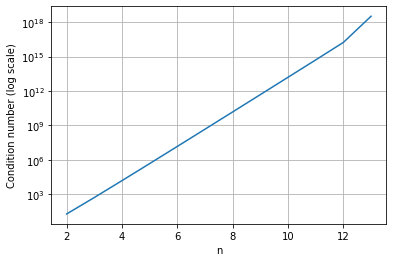

In [23]:
import numpy as np
from scipy.linalg import hilbert
import matplotlib.pyplot as plt

lower = 2
upper = 14

ns = np.arange(lower, upper)
Ks = np.empty(upper-lower)

for i,n in enumerate(ns):
    Ks[i] = np.linalg.cond(hilbert(n))

plt.figure()
plt.plot(ns, Ks)
plt.grid(True)
plt.yscale('log')
plt.ylabel('Condition number (log scale)')
plt.xlabel('n')

plt.show()

**b)**

      x: [-2.  6.] 
 (x+dx):  [-1.995  5.982] 

      x: [  3. -24.  30.] 
 (x+dx):  [  3.025 -24.351  30.43 ] 

      x: [  -4.   60. -180.  140.] 
 (x+dx):  [  1.684  -5.648 -20.364  35.658] 

      x: [    5.  -120.   630. -1120.   630.] 
 (x+dx):  [  3.235 -14.902 -26.797  87.387 -38.654] 

      x: [-6.000e+00  2.100e+02 -1.680e+03  5.040e+03 -6.300e+03  2.772e+03] 
 (x+dx):  [ -11.635  -63.972  700.751 -967.815 -308.813  691.169] 



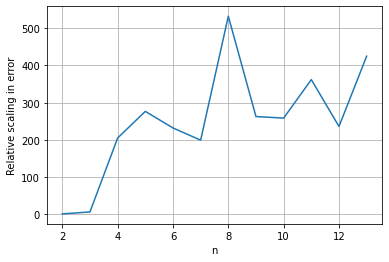

In [59]:
from numpy.linalg import norm

bs, Hs, delta_bs, delta_Hs = [],[],[],[]
xs, delta_xs = [],[]
conditions = []

scale = 0.01 # To make perturbations small enough

for i,n in enumerate(ns):
    bs.append(np.ones(n))
    Hs.append(hilbert(n))
    
    delta_bs.append(np.random.rand()*scale)
    delta_Hs.append(np.random.rand(n,n) * 1/(2*n+1)*scale)
    
    xs.append(np.linalg.solve(Hs[i],bs[i]))
    delta_xs.append(np.linalg.solve(Hs[i]+delta_Hs[i], bs[i]+delta_bs[i]) - xs[i])
    
    conditions.append(norm(delta_xs[i])/norm(xs[i]) / (norm(delta_Hs[i])/norm(Hs[i]) + norm(delta_bs[i])/norm(bs[i])))

# Compare first 5 solutions to illustrate difference
[print("      x:",np.round(xs[i],3),"\n","(x+dx): ",np.round(xs[i]+delta_xs[i],3),"\n") for i in range(5)]

plt.figure()
plt.plot(ns, conditions)
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Relative scaling in error')
plt.show()

### Problem X
This problem is not so easy, but needs to be answered in order to get the top score. You can get a good score also without solving this problem completely, and you can always ask for hints from the teaching assistant or the lecturer.

Let $A$ be any invertible $n\times n$-matrix. Suppose that $\delta A$ is the smallest possible matrix, measured in a subordinate (natural) matrix norm $\|\cdot\|$ such that $A+\delta A$ is singular. Show that

$$
    \|\delta A\|  = \|A^{-1}\|^{-1}
$$